### moment maps of CO, 13CO, and C18O

#### 12/14/22  jpw

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.wcs import WCS
from astropy.io import fits
from radio_beam import Beam
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
from matplotlib.patches import Ellipse
from astropy.visualization import (MinMaxInterval, SqrtStretch, SinhStretch, AsinhStretch, ImageNormalize)
from matplotlib.patches import Ellipse
from astropy.visualization import make_lupton_rgb
from astropy.utils.data import get_pkg_data_filename
%matplotlib inline

In [2]:
path = '/Volumes/JPW2T/OphIRS43/ALMA/SB/'
filename1 = "12co_mom0_sm.fits"
filename2 = "13co_mom0_sm5.fits"
filename3 = "c18o_mom0_sm5.fits"

In [3]:
hdu1 = fits.open(path+filename1)[0]
d1 = hdu1.data.squeeze()
h1 = hdu1.header

hdu2 = fits.open(path+filename2)[0]
d2 = hdu2.data.squeeze()
h2 = hdu2.header

hdu3 = fits.open(path+filename3)[0]
d3 = hdu3.data.squeeze()
h3 = hdu3.header

In [4]:
b1 = Beam.from_fits_header(h1)
b2 = Beam.from_fits_header(h2)
b3 = Beam.from_fits_header(h3)
print(b1)
print(b2)
print(b3)

Beam: BMAJ=0.25000000020630003 arcsec BMIN=0.24999999982250398 arcsec BPA=0.0 deg
Beam: BMAJ=0.5000000000119199 arcsec BMIN=0.49999999872420003 arcsec BPA=0.0 deg
Beam: BMAJ=0.5000000000922 arcsec BMIN=0.49999999365360004 arcsec BPA=0.0 deg


In [5]:
# manually set a single median value
bmaj1 = 0.25
bmin1 = 0.25
bpa1  = 0
bmaj2 = 0.5
bmin2 = 0.5
bpa2  = 0

xb,yb = 9, -5    # plot location of beam in axis units below (relative, arcseconds)

In [6]:
vla1 = SkyCoord('16h27m26.906s', '-24d40m50.82s', frame='icrs')
vla2 = SkyCoord('16h27m26.911s', '-24d40m51.40s', frame='icrs')
dra, ddec = vla1.spherical_offsets_to(vla2)
x_vla2 = dra.to(u.arcsec).value
y_vla2 = ddec.to(u.arcsec).value

td = SkyCoord('16h27m26.602s', '-24d40m45.70s', frame='icrs')
dra, ddec = vla1.spherical_offsets_to(td)
x_td = dra.to(u.arcsec).value
y_td = ddec.to(u.arcsec).value

In [7]:
def plot_moment0(cube1, h1, cube2, h2, cube3, h3, vstart, vend, dv=None, vmin1=None, vmax1=None, vmin2=None, vmax2=None, vmin3=None, vmax3=None, extent=None, pdf=None):
    ra1  = h1['CRVAL1'] + (1+np.arange(h1['NAXIS1'])-h1['CRPIX1'])*h1['CDELT1']    # degrees
    dec1 = h1['CRVAL2'] + (1+np.arange(h1['NAXIS2'])-h1['CRPIX2'])*h1['CDELT2']
    dra1 = (ra1 - vla1.ra.value) * 3600
    ddec1 = (dec1 - vla1.dec.value) * 3600
    
    ra2  = h2['CRVAL1'] + (1+np.arange(h2['NAXIS1'])-h2['CRPIX1'])*h2['CDELT1']    # degrees
    dec2 = h2['CRVAL2'] + (1+np.arange(h2['NAXIS2'])-h2['CRPIX2'])*h2['CDELT2']
    dra2 = (ra2 - vla1.ra.value) * 3600
    ddec2 = (dec2 - vla1.dec.value) * 3600
    
    ra3  = h3['CRVAL1'] + (1+np.arange(h3['NAXIS1'])-h3['CRPIX1'])*h3['CDELT1']    # degrees
    dec3 = h3['CRVAL2'] + (1+np.arange(h3['NAXIS2'])-h3['CRPIX2'])*h3['CDELT2']
    dra3 = (ra3 - vla1.ra.value) * 3600
    ddec3 = (dec3 - vla1.dec.value) * 3600    
    
    if extent == None:
        extent = [dra1[0], dra1[-1], ddec1[0], ddec1[-1]]
        imin1 = 0
        imax1 = h['NAXIS1']-1
        jmin1 = 0
        jmax1 = h['NAXIS2']-1
        imin2 = np.argmin(np.abs(dra2-extent[0]))
        imax2 = np.argmin(np.abs(dra2-extent[1]))
        jmin2 = np.argmin(np.abs(ddec2-extent[2]))
        jmax2 = np.argmin(np.abs(ddec2-extent[3]))
        imin3 = np.argmin(np.abs(dra3-extent[0]))
        imax3 = np.argmin(np.abs(dra3-extent[1]))
        jmin3 = np.argmin(np.abs(ddec3-extent[2]))
        jmax3 = np.argmin(np.abs(ddec3-extent[3]))
    else:
        extent = extent
        imin1 = np.argmin(np.abs(dra1-extent[0]))
        imax1 = np.argmin(np.abs(dra1-extent[1]))
        jmin1 = np.argmin(np.abs(ddec1-extent[2]))
        jmax1 = np.argmin(np.abs(ddec1-extent[3]))
        imin2 = np.argmin(np.abs(dra2-extent[0]))
        imax2 = np.argmin(np.abs(dra2-extent[1]))
        jmin2 = np.argmin(np.abs(ddec2-extent[2]))
        jmax2 = np.argmin(np.abs(ddec2-extent[3]))
        imin3 = np.argmin(np.abs(dra3-extent[0]))
        imax3 = np.argmin(np.abs(dra3-extent[1]))
        jmin3 = np.argmin(np.abs(ddec3-extent[2]))
        jmax3 = np.argmin(np.abs(ddec3-extent[3]))
    asp = np.abs((extent[3] - extent[2]) / (extent[1] - extent[0]))
    
    fig = plt.figure(figsize=(10,7))
    ax = plt.subplot(111)
    
    im3 = cube3[jmin3:jmax3, imin3:imax3]
    print(im3.min(), im3.max())
    norm3 = ImageNormalize(im3, vmin=vmin3, vmax=vmax3, stretch=AsinhStretch(0.3))
    ax.imshow(im3, extent=extent, origin='lower', norm=norm3, alpha=1, cmap=mpl.colormaps['Greens'])

    im2 = cube2[jmin2:jmax2, imin2:imax2]
    print(im2.min(), im2.max())
    norm2 = ImageNormalize(im2, vmin=vmin2, vmax=vmax2, stretch=AsinhStretch(0.3))
    ax.imshow(im2, extent=extent, origin='lower', norm=norm2, alpha=0.8, cmap=mpl.colormaps['Reds'])

    im1 = cube1[jmin1:jmax1, imin1:imax1]
    print(im1.min(), im1.max())
    norm1 = ImageNormalize(im1, vmin=vmin1, vmax=vmax1, stretch=AsinhStretch(0.1))
    ax.imshow(im1, extent=extent, origin='lower', norm=norm1, alpha=0.7, cmap=mpl.colormaps['Blues'])
    
    #ax.text(0.95, 0.88, f"{v1[cube_index1]:4.2f}", color='black', ha='right', fontsize=10, transform=ax.transAxes)
    
    #ticks = np.arange(-10,11,5)
    #ax.set_xticks(ticks)
    #ax.set_yticks(ticks)
    ax.grid(ls=':', lw=0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=8)

    ax.set_xlabel(r"$\Delta\alpha ('')$", fontsize=14)
    ax.set_ylabel(r"$\Delta\delta ('')$", fontsize=14)
    ax.plot(0, 0, '+', ms=20, mew=3, color='white')
    ax.plot(0, 0, '+', ms=15, mew=1, color='black')
    ax.plot(x_vla2, y_vla2, '+', ms=15, mew=3, color='white')
    ax.plot(x_vla2, y_vla2, '+', ms=10, mew=1, color='black')
    ax.plot(x_td, y_td, '+', ms=10, mew=2, color='black')
    ax.plot(x_td, y_td, '+', ms=10, mew=2, color='black')
    
    beam1 = Ellipse((x,y), bmaj1, bmin1, angle=90-bpa1, edgecolor='none', facecolor='gray', linewidth=1)
    ax.add_patch(beam1)
    beam2 = Ellipse((x,y), bmaj2, bmin2, angle=90-bpa2, edgecolor='black', facecolor='none', linewidth=1)
    ax.add_patch(beam2)

    #fig.tight_layout()
    try:
        plt.savefig(pdf)
        print("Image saved as "+pdf)
    except:
        pass

In [8]:
#plot_moment0(d1, h1, d2, h2, d3, h3, 3.5, -11.5, dv=14, extent = [10, -10, -6, 6], pdf="CO_moment0.pdf", vmin1=0, vmax1=1.5, vmin2=0.0, vmax2=1, vmin3=0.0, vmax3=0.3)

In [55]:
def rgb(cube1, h1, cube2, h2, cube3, h3, extent=None, pdf=None):
    ra1  = h1['CRVAL1'] + (1+np.arange(h1['NAXIS1'])-h1['CRPIX1'])*h1['CDELT1']    # degrees
    dec1 = h1['CRVAL2'] + (1+np.arange(h1['NAXIS2'])-h1['CRPIX2'])*h1['CDELT2']
    dra1 = (ra1 - vla1.ra.value) * 3600
    ddec1 = (dec1 - vla1.dec.value) * 3600
    
    ra2  = h2['CRVAL1'] + (1+np.arange(h2['NAXIS1'])-h2['CRPIX1'])*h2['CDELT1']    # degrees
    dec2 = h2['CRVAL2'] + (1+np.arange(h2['NAXIS2'])-h2['CRPIX2'])*h2['CDELT2']
    dra2 = (ra2 - vla1.ra.value) * 3600
    ddec2 = (dec2 - vla1.dec.value) * 3600
    
    ra3  = h3['CRVAL1'] + (1+np.arange(h3['NAXIS1'])-h3['CRPIX1'])*h3['CDELT1']    # degrees
    dec3 = h3['CRVAL2'] + (1+np.arange(h3['NAXIS2'])-h3['CRPIX2'])*h3['CDELT2']
    dra3 = (ra3 - vla1.ra.value) * 3600
    ddec3 = (dec3 - vla1.dec.value) * 3600    
    
    if extent == None:
        extent = [dra1[0], dra1[-1], ddec1[0], ddec1[-1]]
        imin1 = 0
        imax1 = h['NAXIS1']-1
        jmin1 = 0
        jmax1 = h['NAXIS2']-1
        imin2 = np.argmin(np.abs(dra2-extent[0]))
        imax2 = np.argmin(np.abs(dra2-extent[1]))
        jmin2 = np.argmin(np.abs(ddec2-extent[2]))
        jmax2 = np.argmin(np.abs(ddec2-extent[3]))
        imin3 = np.argmin(np.abs(dra3-extent[0]))
        imax3 = np.argmin(np.abs(dra3-extent[1]))
        jmin3 = np.argmin(np.abs(ddec3-extent[2]))
        jmax3 = np.argmin(np.abs(ddec3-extent[3]))
    else:
        extent = extent
        imin1 = np.argmin(np.abs(dra1-extent[0]))
        imax1 = np.argmin(np.abs(dra1-extent[1]))
        jmin1 = np.argmin(np.abs(ddec1-extent[2]))
        jmax1 = np.argmin(np.abs(ddec1-extent[3]))
        imin2 = np.argmin(np.abs(dra2-extent[0]))
        imax2 = np.argmin(np.abs(dra2-extent[1]))
        jmin2 = np.argmin(np.abs(ddec2-extent[2]))
        jmax2 = np.argmin(np.abs(ddec2-extent[3]))
        imin3 = np.argmin(np.abs(dra3-extent[0]))
        imax3 = np.argmin(np.abs(dra3-extent[1]))
        jmin3 = np.argmin(np.abs(ddec3-extent[2]))
        jmax3 = np.argmin(np.abs(ddec3-extent[3]))
    asp = np.abs((extent[3] - extent[2]) / (extent[1] - extent[0]))
    
    fig = plt.figure(figsize=(9,6))
    ax = plt.subplot(111)
    
    # rgb
    im1 = cube1[jmin1:jmax1, imin1:imax1]
    im2 = cube2[jmin2:jmax2, imin2:imax2]
    im3 = cube3[jmin3:jmax3, imin3:imax3]
    rgb = make_lupton_rgb(2*im1/np.max(im1), im2/np.max(im2), im3/np.max(im3), Q=1, stretch=0.7)
    ax.imshow(rgb, origin='lower', extent=extent)

    # grid
    #ax.grid(ls=':', lw=0.5)
    #ax.tick_params(axis='both', which='major', labelsize=12)
    #ax.tick_params(axis='both', which='minor', labelsize=8)

    # annotations
    ax.set_xlabel(r"$\Delta\alpha ('')$", fontsize=12)
    ax.set_ylabel(r"$\Delta\delta ('')$", fontsize=12)
    ax.plot(0, 0, '+', ms=10, mew=2, color='white')
    ax.plot(x_vla2, y_vla2, '+', ms=7, mew=2, color='white')
    ax.plot(x_td, y_td, '+', ms=7, mew=2, color='white')
    ax.text(0.2, 0.15, "VLA1", color='white', ha='right', fontsize=10)
    ax.text(x_vla2-0.25, y_vla2-0.3, "VLA2", color='white', ha='left', fontsize=10)
    ax.text(x_td+0.25, y_td+0.15, "GY263", color='white', ha='right', fontsize=10)
    ax.text(7, 0, "envelope", color='white', ha='center', fontsize=10)
    ax.text(-1, -3, "outflow\n cavity", color='white', ha='center', fontsize=10)
    ax.annotate("bubble",
            xy=(1.0, 2.5), xycoords='data',
            xytext=(5, 4.8), textcoords='data', color='white',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.4", color='white'))
   
    # beams
    beam1 = Ellipse((xb,yb+1.4), bmaj1, bmin1, angle=90-bpa1, edgecolor='white', facecolor='red', alpha=0.6)
    ax.add_patch(beam1)
    ax.text(xb-0.5, yb+1.28, r'CO', color='white', fontsize=11)
    beam2 = Ellipse((xb,yb+0.7), bmaj2, bmin2, angle=90-bpa2, edgecolor='white', facecolor='green', alpha=0.6)
    ax.add_patch(beam2)
    ax.text(xb-0.5, yb+0.58, r'$^{13}$CO', color='white', fontsize=11)
    beam3 = Ellipse((xb,yb), bmaj2, bmin2, angle=90-bpa2, edgecolor='white', facecolor='blue', alpha=0.6)
    ax.add_patch(beam3)
    ax.text(xb-0.5, yb-0.12, r'C$^{18}O$', color='white', fontsize=11)

    # scale bar
    d = 137.3   # pc
    s = 250.0   # scale bar size in au
    t = s/d     # arcsec
    xs = 5
    ys = yb
    ax.plot([xs-0.5*t, xs+0.5*t], [ys, ys], 'w-', lw=2)
    ax.plot([xs-0.5*t, xs-0.5*t], [ys-0.05*t, ys+0.05*t], 'w-', lw=2)
    ax.plot([xs+0.5*t, xs+0.5*t], [ys-0.05*t, ys+0.05*t], 'w-', lw=2)
    ax.text(xs, ys+0.09*t, '250 au', color='white', ha='center', fontsize=11)
    
    # manually fix the xticknames for the -10 to +10 case
    ax.set_xticks([10, 8, 6, 4, 2, 0, -2, -4, -6, -8, -10])

    fig.tight_layout()
    try:
        plt.savefig(pdf)
        print("Image saved as "+pdf)
    except:
        pass

Image saved as CO_mom0_rgb.pdf


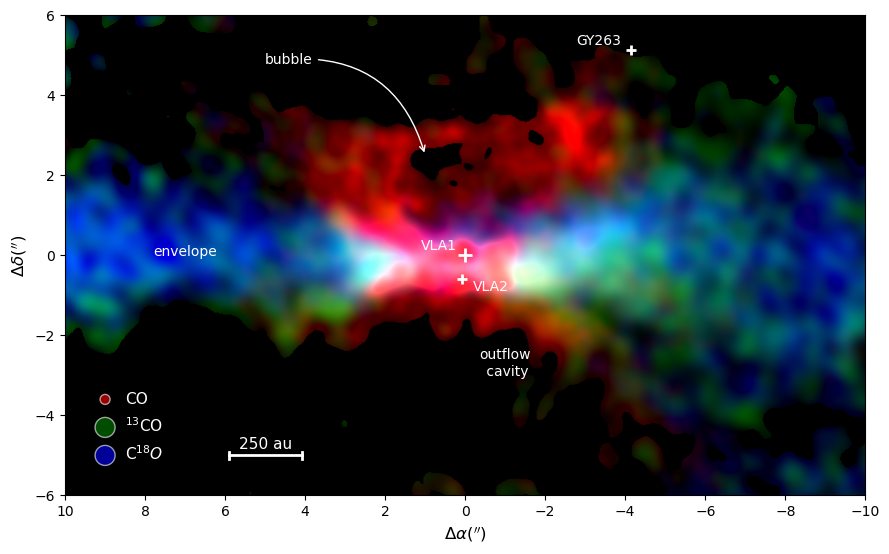

In [56]:
rgb(d1, h1, d2, h2, d3, h3, extent = [10, -10, -6, 6], pdf="CO_mom0_rgb.pdf")